## Introduction: 

** just a VERY rough draft - will edit this by saturday
Provide some relevant background information on the topic so that someone unfamiliar with it will be prepared to understand the rest of your report

- frank wood and his research team collected data about how ppl play video games through opening a minecradt server
- there were 2 datasets from this experiment: players dataset and sessions dataset (breifly explain both dataset)

clearly state the question you tried to answer with your project
- Broad question: "What 'kinds' of players are most likely to contribute a large amount of data to the dataset?".
 
- Specific research question:  "Can a player's age and gender be used to predict the amount of time they spend playing Minecraft in the 'players.csv' dataset".

identify and fully describe the dataset that was used to answer the question

- we will be using players dataset to answer our question
- explain dataset


The Data (descibing data set and obervations/ variables)

## Methods for Analysis

Before undergoing any ananlysis on the loaded datasets, all of the necessary packages must be loaded into R. 

In [11]:
library(tidyverse)
library(repr)
library(tidymodels)
library(GGally)
library(ISLR)
library(dplyr)
options(repr.matrix.max.rows = 6)
source("cleanup.R")

Warning message in file(filename, "r", encoding = encoding):
“cannot open file 'cleanup.R': No such file or directory”


ERROR: Error in file(filename, "r", encoding = encoding): cannot open the connection


In [12]:
players <- read_csv("https://raw.githubusercontent.com/natlogan6/Dsci100-individual-/refs/heads/main/players.csv")
players

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,57
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


In [13]:
player_filtered <- players |>
select (experience, subscribe, played_hours, gender, Age) |> 
filter (played_hours != 0.0) |> 
drop_na (Age) |>
mutate(gender = as_factor(gender)) |>
mutate(experience = as_factor (experience))

player_filtered

experience,subscribe,played_hours,gender,Age
<fct>,<lgl>,<dbl>,<fct>,<dbl>
Pro,TRUE,30.3,Male,9
Veteran,TRUE,3.8,Male,17
Amateur,TRUE,0.7,Female,21
⋮,⋮,⋮,⋮,⋮
Veteran,TRUE,0.1,Female,44
Veteran,FALSE,0.3,Male,22
Amateur,FALSE,2.3,Male,17


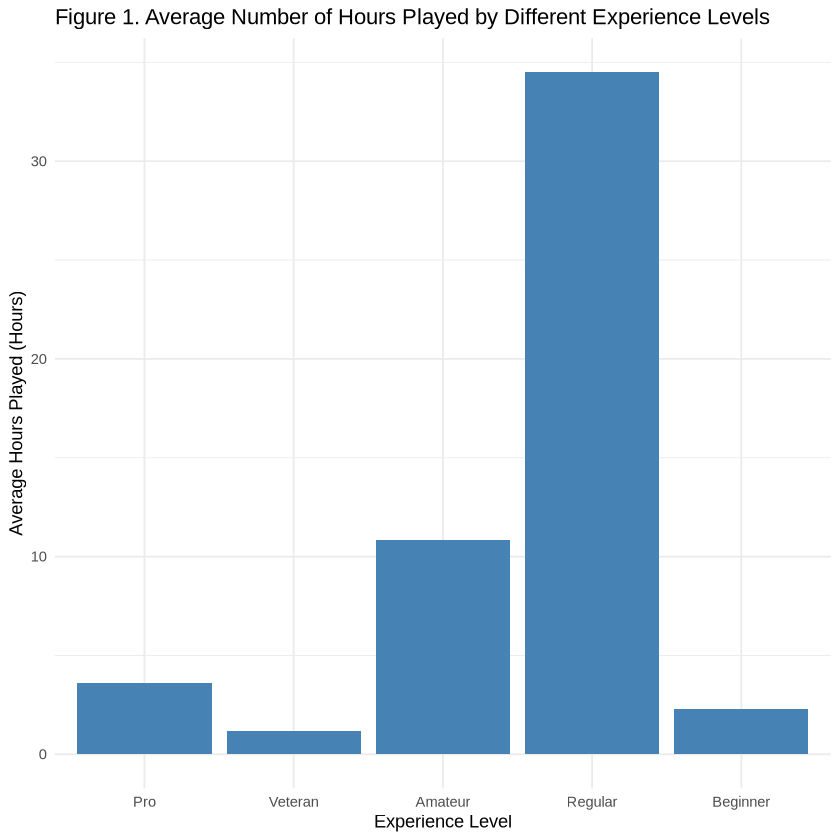

In [14]:
player_data_experience_mean <- player_filtered |>
group_by (experience) |>
summarise(played_hours = mean (played_hours, na.rm = TRUE) )


ggplot (player_data_experience_mean, aes(x = experience, y = played_hours)) +
geom_bar (stat = "identity", fill = "steelblue") +
labs (title = "Figure 1. Average Number of Hours Played by Different Experience Levels",
x = "Experience Level",
y = "Average Hours Played (Hours)") +
theme_minimal()

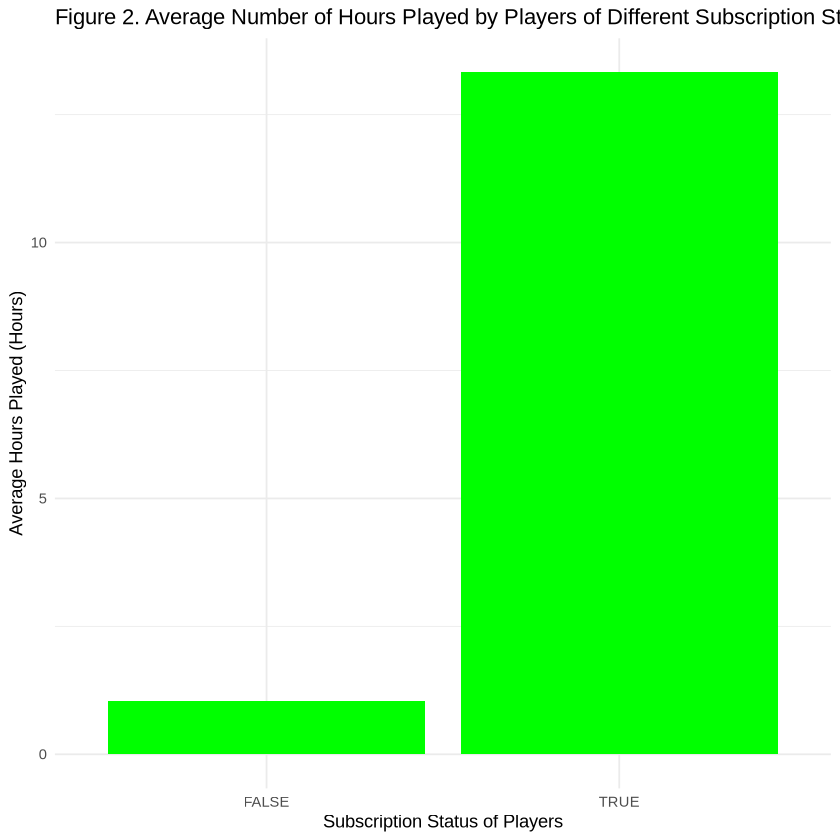

In [15]:
player_data_subscribe_mean <- player_filtered |>
group_by(subscribe) |>
summarise(played_hours = mean(played_hours, na.rm = TRUE))


ggplot(player_data_subscribe_mean, aes(x = subscribe, y = played_hours)) +
geom_bar (stat = "identity",
fill = "green") +
labs (title = "Figure 2. Average Number of Hours Played by Players of Different Subscription Status",
x = "Subscription Status of Players",
y = "Average Hours Played (Hours)") +
theme_minimal()

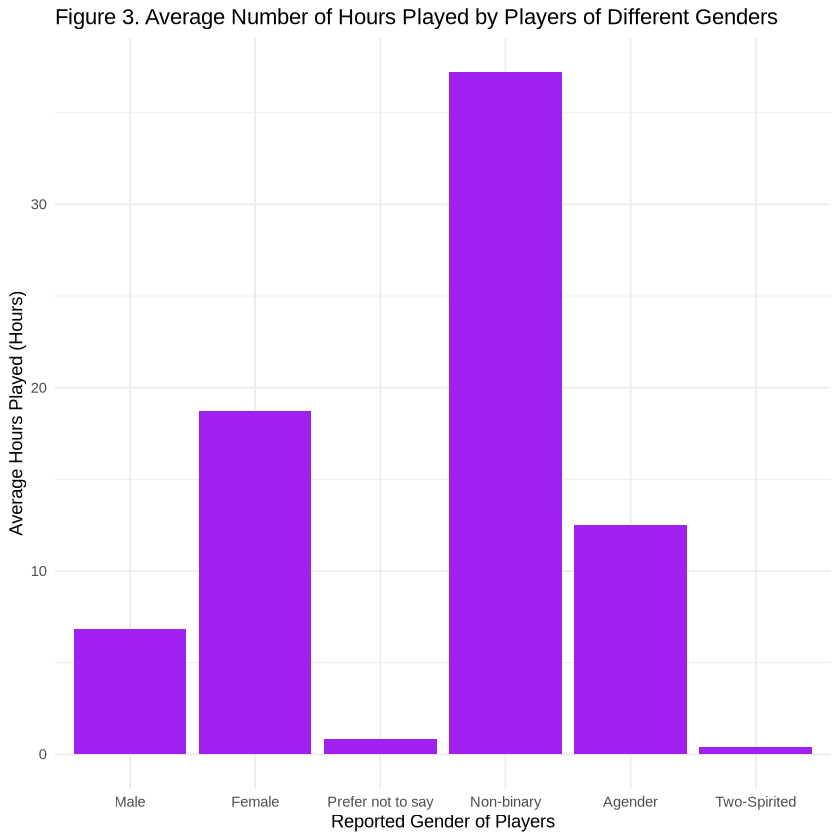

In [16]:
player_data_gender_mean <- player_filtered |> 
group_by (gender) |>
summarise(played_hours = mean (played_hours, na.rm = TRUE))


ggplot(player_data_gender_mean, aes (x = gender, y = played_hours) ) +
geom_bar(stat = "identity", fill = "purple") +
labs (title = "Figure 3. Average Number of Hours Played by Players of Different Genders",
x = "Reported Gender of Players",
y = "Average Hours Played (Hours)") +
theme_minimal()

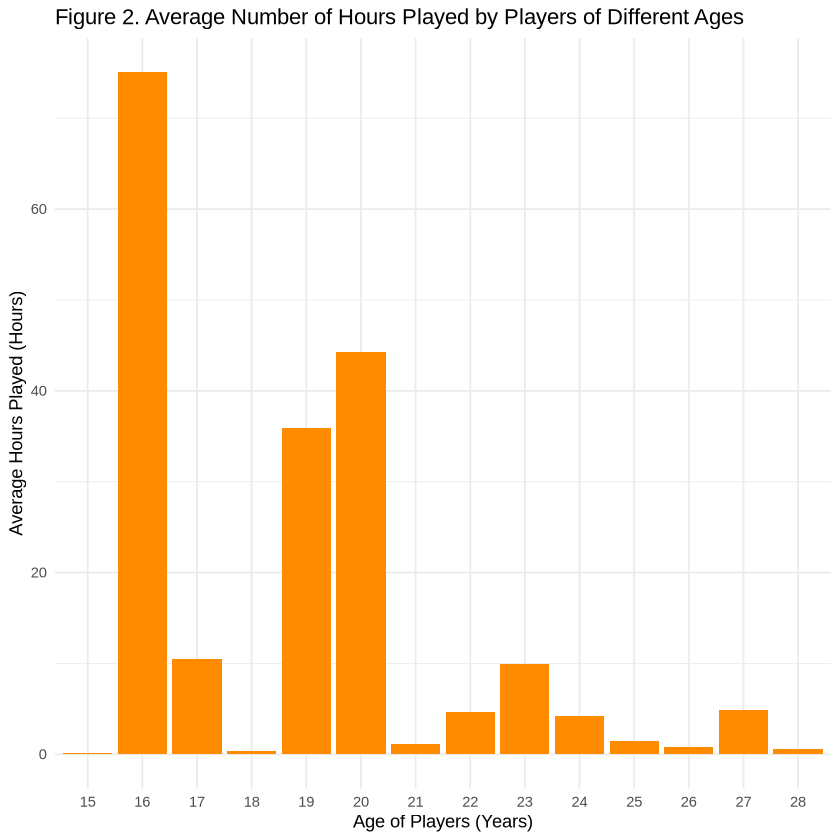

In [17]:
player_data_age_mean <- player_filtered |>
filter (Age >= 15 & Age <= 30) |> 
group_by (Age) |>
summarise (played_hours = mean (played_hours, na.rm = TRUE))


ggplot(player_data_age_mean, aes(x = factor(Age), y = played_hours)) +
geom_bar(stat = "identity", fill = "darkorange") +
labs (title = "Figure 2. Average Number of Hours Played by Players of Different Ages",
x = "Age of Players (Years)",
y = "Average Hours Played (Hours)") +
theme_minimal()

## Results and Further Analysis

We first divide the filtered player dataset into a 75% training set and a 25% testing set using stratified sampling on played_hours to ensure both sets have similar playtime distributions. The training set is used to fit the models, and the testing set is used to assess their performance on unseen data. This approach helps us reliably identify which player demographics are associated with higher levels of data contribution.

In [18]:
players_split <- initial_split(player_filtered, prop = 0.75, strata = played_hours) 
players_training <- training(players_split)
players_testing <- testing(players_split)

players_training
players_testing

experience,subscribe,played_hours,gender,Age
<fct>,<lgl>,<dbl>,<fct>,<dbl>
Amateur,TRUE,0.1,Male,47
Amateur,TRUE,0.2,Male,22
Amateur,TRUE,0.5,Male,17
⋮,⋮,⋮,⋮,⋮
Veteran,FALSE,2.7,Non-binary,21
Amateur,FALSE,2.1,Male,24
Amateur,FALSE,2.3,Male,17


experience,subscribe,played_hours,gender,Age
<fct>,<lgl>,<dbl>,<fct>,<dbl>
Pro,TRUE,30.3,Male,9
Regular,TRUE,0.1,Male,21
Regular,TRUE,0.6,Male,19
⋮,⋮,⋮,⋮,⋮
Veteran,FALSE,0.1,Male,17
Beginner,FALSE,1.8,Male,32
Amateur,TRUE,32.0,Male,22


The code first divides the dataset into training (75%) and testing (25%) sets. Using (strata = played_hours) ensures that the distribution of played_hours remains similar in both sets. 

The following code fits a linear regression model that predicts the number of hours an individual plays based on their age.


In [19]:
players_recipe <- recipe(played_hours ~ Age, data = player_filtered) 

players_spec <- linear_reg() |>
    set_engine("lm") |>
    set_mode("regression") 

players_fit <- workflow() |>
    add_recipe(players_recipe) |>
    add_model(players_spec) |>
    fit(data = players_training)

players_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: linear_reg()

── Preprocessor ────────────────────────────────────────────────────────────────
0 Recipe Steps

── Model ───────────────────────────────────────────────────────────────────────

Call:
stats::lm(formula = ..y ~ ., data = data)

Coefficients:
(Intercept)          Age  
    23.7381      -0.5296  


The results indicate that predicted playtime decreases as age increases, suggesting a negative relationship between age and player engagement on the Minecraft server. Next, we use the trained model (players_fit) to generate predictions on the test set, merge these predictions with the observed values, and evaluate model performance by comparing predicted and actual played_hours.


In [20]:
players_test_results <- players_fit |>
    predict(players_testing) |>
    bind_cols(players_testing) |>
    metrics(truth = played_hours, estimate = .pred)

players_test_results 

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,12.11758520
rsq,standard,0.03230324
mae,standard,11.51579497


The $R^2$ (rsq) value from this model is approximately 0.14 which shows that age explains about 14% of the variation in the response played_hours, leaving 86% unexplained. Therefore age is not a strong predictor of play time. 

Now we will filter and create a tibble of the maximum and minimum age from the dataset. 

In [21]:
player_age_minimum <- player_filtered |>
    select(Age) |>
    min()

player_age_maximum <- player_filtered |>
    select(Age) |>
    max()

played_hours_prediction <- tibble(Age = c(player_age_minimum, player_age_maximum))

played_hours_prediction

Age
<dbl>
9
58


Next, we use the linear regression model to predict playtime (.pred) for the youngest and oldest players, and then visualize the results by plotting the observed data alongside a red regression line that represents the model’s predicted relationship between age and hours played.

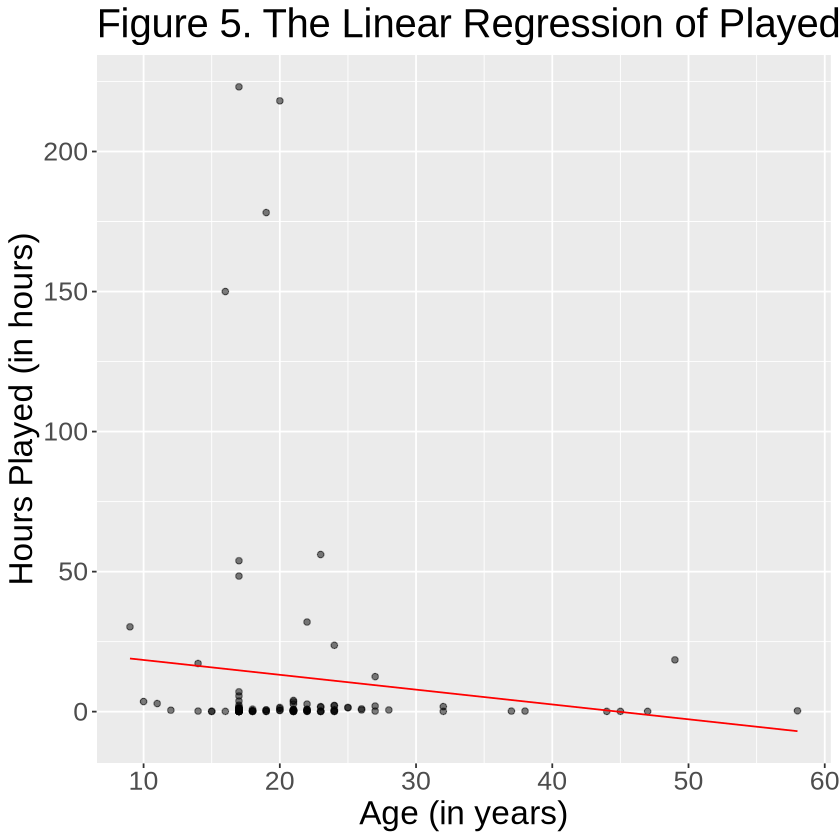

In [22]:
player_predictions <- predict(players_fit, played_hours_prediction) |>
    bind_cols(played_hours_prediction)

age_plot <- ggplot(player_filtered, aes(x = Age, y = played_hours)) +
    geom_point(alpha = 0.5) +
    geom_line(data = player_predictions,
              mapping = aes(x = Age, y = .pred),
              color = "red") +
    xlab("Age (in years)") +
    ylab("Hours Played (in hours)") +
    ggtitle("Figure 5. The Linear Regression of Played Hours and Age") +
    theme(text = element_text(size = 20))
age_plot

The resulting plot shows a slight negative relationship between age and playtime, suggesting that older players tend to spend fewer hours playing. 

Next, following a similar approach, we will create and train a linear regression model to predict played_hours using gender instead of age.


In [23]:
player_recipe <- recipe(played_hours ~ gender, data = players_training)

player_spec <- linear_reg() |>
    set_engine("lm") |>
    set_mode("regression") 

player_fit <- workflow() |>
    add_recipe(player_recipe) |>
    add_model(player_spec) |>
    fit(data = players_training)
player_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: linear_reg()

── Preprocessor ────────────────────────────────────────────────────────────────
0 Recipe Steps

── Model ───────────────────────────────────────────────────────────────────────

Call:
stats::lm(formula = ..y ~ ., data = data)

Coefficients:
            (Intercept)             genderFemale  genderPrefer not to say  
                  7.904                   12.622                   -7.084  
       genderNon-binary       genderTwo-Spirited  
                 29.296                   -7.504  


The linear regression model predicts played hours relative to male players, who are the baseline at 7.22 hours. Female players are predicted to play 14.60 more hours than males (21.81 hours total), non-binary players 47.89 more hours (55.10 hours total), agender players 5.29 more hours (12.50 hours total), and those who prefer not to disclose their gender 6.29 fewer hours (0.93 hours total).

Next, we will use the trained model to generate predicted playtime values for the testing set and merge these predictions with the actual testing data into a single table.

In [24]:
players_test_results <- players_fit |>
    predict(players_testing) |>
    bind_cols(players_testing)

players_test_results

.pred,experience,subscribe,played_hours,gender,Age
<dbl>,<fct>,<lgl>,<dbl>,<fct>,<dbl>
18.97152,Pro,TRUE,30.3,Male,9
12.61609,Regular,TRUE,0.1,Male,21
13.67533,Regular,TRUE,0.6,Male,19
⋮,⋮,⋮,⋮,⋮,⋮
14.734570,Veteran,FALSE,0.1,Male,17
6.790281,Beginner,FALSE,1.8,Male,32
12.086474,Amateur,TRUE,32.0,Male,22


Next, we will create a plot to show the actual and predicted playtime for each gender

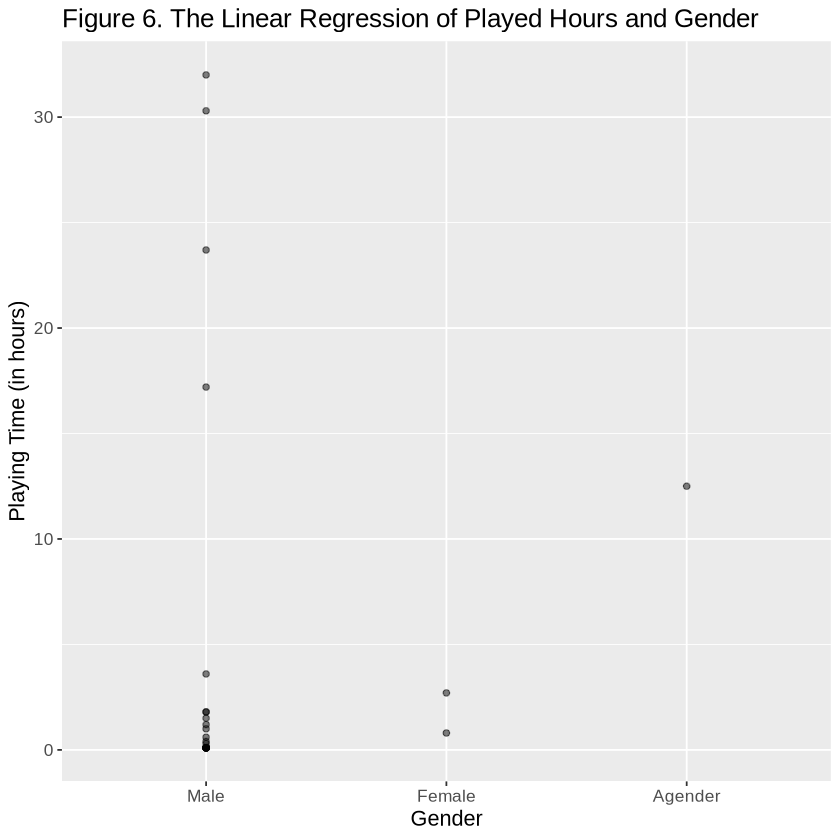

In [25]:
gender_plot <- ggplot(players_test_results, aes(x = gender, y = played_hours)) +
    geom_point(alpha = 0.5)  +
    xlab("Gender") +
    ylab("Playing Time (in hours)") +
    ggtitle("Figure 6. The Linear Regression of Played Hours and Gender") +
    theme(text = element_text(size = 13))

gender_plot


interpret this figure...

In [37]:
# linear regression with both age and gender as predictor variables
players_model <- players |>
    select(played_hours, Age, gender)|>
    drop_na(played_hours, Age, gender)|>
    mutate(gender = as.factor(gender))

players_split_lm <- initial_split(players_model, prop = 0.75, strata = played_hours)
players_training_lm <- training(players_split_lm)
players_testing_lm <- testing(players_split_lm)

session_recipe <- recipe(played_hours ~ Age + gender, data = players_training_lm)

lm_spec <- linear_reg() |>
                set_engine("lm") |>
                set_mode("regression")

session_fit <- workflow() |>
                add_recipe(session_recipe) |>
                add_model(lm_spec) |>
                fit(data = players_training_lm)

#on training dataset
lm_rmse <- session_fit |>
                predict(players_training_lm) |>
                bind_cols(players_training_lm) |>
                metrics(truth = played_hours, estimate = .pred) |>
                filter(.metric == 'rmse') |>
                select(.estimate) |>
                pull()
lm_rmse

#on testing dataset
lm_rmspe <- session_fit |>
                predict(players_testing_lm) |>
                bind_cols(players_testing_lm) |>
                metrics(truth = played_hours, estimate = .pred) |>
                filter(.metric == 'rmse') |>
                select(.estimate) |>
                pull()
lm_rmspe

#answer changes every time I run this code - because we didn't set a seed code so it takes random observations each time
# we could set up a seed coat for all the codes so split, model, prediction, etc. doesn't change

[1] 26.64593

[1] 32.33352

## Discussion

- summarize what you found
- discuss whether this is what you expected to find

Expectations:
Men contribute more data

Teens to young adults contribute more data
- discuss what impact could such findings have
- discuss what future questions could this lead to